In [1]:
import numpy as np
import numpy.linalg as npl
import statsmodels.api as smf

In [2]:
import pandas as pd

# Sin intercepto

Las funciones siguientes permiten de generar W_i, eta_i, u_i, X_i, luego y_i sin intercepto (beta_0=0).

In [3]:
W_gen = lambda sigma_w,n : sigma_w*np.random.randn(n)


def eta_u_gen(sigma_eta,theta,n):
    
    sigma = np.array([[sigma_eta**2,theta*sigma_eta],[theta*sigma_eta,1]])
    
    result = npl.eig(sigma)
    
    D = np.diag(result[0])
    O = result[1]
    B = O@D**(1/2)
    
    N1 = np.random.randn(n)
    N2 = np.random.randn(n)
    
    N_new1 = []
    N_new2 = []

    for nn1,nn2 in zip(N1,N2):
    
     N_new1.append(B[0,0]*nn1 + B[0,1]*nn2)
     N_new2.append(B[1,0]*nn1 + B[1,1]*nn2)
    
    return np.array([N_new1,N_new2])
    

X_gen = lambda alpha,W,eta : alpha*W+eta

y_gen = lambda beta,X,u : (beta*X + u > 0).astype(int)

In [4]:
import scipy.stats as ss

Definimos el valor de los parametros.

In [5]:
n = 100000

alpha = 0.7

beta = 2

sigma_w = 1
sigma_eta = np.sqrt(1-alpha**2)
theta = 0.7

La función siguiente estima los parametros beta_1 y theta cuando no hay intercepto: beta_0=0, beta_1=beta.

In [6]:
def estimators_sin_intercepto(a,b,alpha,sigma_w,sigma_eta):

    gamma = (np.sqrt(2*np.pi)*alpha*sigma_w**2)/(np.sqrt(alpha**2*sigma_w**4+\
                                                   2*a**2*alpha**2*sigma_w**2*np.pi\
                                                   -4*a*b*alpha*sigma_w**2*np.pi\
                                                   +2*a**2*np.pi*sigma_eta**2))
    beta_est = a*gamma/(alpha*sigma_w**2)
    theta_est = (gamma*(b*alpha*sigma_w**2-a*alpha**2*sigma_w**2-a*sigma_eta**2))/(alpha*sigma_w**2*sigma_eta)
    return (beta_est,theta_est,gamma)
    

En lo que sigue, epochs es el número de simulaciones, n es la cantidad de datos por cada simulación.

In [8]:
import time

t_I = time.time()

n = 200000

epochs = 1000

theta = 0.7

list_beta_est = []
list_beta_probit = []
list_theta_est = []

for epoch in range(epochs):
      
   W = W_gen(sigma_w,n)
   eta_u = eta_u_gen(sigma_eta,theta,n)
   eta = eta_u[0]
   u = eta_u[1]
   X = X_gen(alpha,W,eta)
   y = y_gen(beta,X,u)
   alpha_est = np.cov(X,W)[0,1]/W.var()
   sigma_eta_est = (X-alpha_est*W).std() 
   a = (W*y).mean() 
   b = (X*y).mean()
   estimators = estimators_sin_intercepto(a,b,alpha,sigma_w,sigma_eta)
   beta_est = estimators[0]
   list_beta_est.append(beta_est)
   beta_probit = smf.Probit(y,X).fit().params
   list_beta_probit.append(beta_probit)
   theta_est = estimators[1]
   list_theta_est.append(theta_est) 
   
three_estimators = pd.DataFrame({'Beta nuestro estimador':list_beta_est,'Probit':list_beta_probit,'Theta nuestro estimador':\
                                list_theta_est})

t_F = time.time()

print('Se demorró',round((t_F-t_I)/60,0),'minutos')

Optimization terminated successfully.
         Current function value: 0.235661
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236275
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234343
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236980
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235048
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233696
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235539
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234556
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234632
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236388
  

Optimization terminated successfully.
         Current function value: 0.236755
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234481
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235244
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233252
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235182
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233889
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236388
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235867
  

Optimization terminated successfully.
         Current function value: 0.235343
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233966
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.237918
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235112
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236489
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234436
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235376
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236614
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236449
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233694
  

Optimization terminated successfully.
         Current function value: 0.235370
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234290
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234871
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234575
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230684
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233849
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234961
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235778
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236648
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235615
  

Optimization terminated successfully.
         Current function value: 0.234800
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234796
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.232806
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234377
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236282
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235040
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233357
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236880
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234456
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233681
  

Optimization terminated successfully.
         Current function value: 0.235908
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235388
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235705
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235921
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235321
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234523
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234643
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.237051
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234261
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234010
  

Optimization terminated successfully.
         Current function value: 0.233553
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236011
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234528
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235527
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234926
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234406
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234454
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235576
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.237003
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234836
  

Optimization terminated successfully.
         Current function value: 0.235259
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233309
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235579
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234213
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235595
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233040
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234555
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235265
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234866
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235498
  

Optimization terminated successfully.
         Current function value: 0.234464
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.237309
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234589
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234193
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233255
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234114
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235610
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233773
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234585
  

Optimization terminated successfully.
         Current function value: 0.233755
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235250
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234899
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235786
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236078
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236180
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234869
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233639
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235517
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233646
  

Optimization terminated successfully.
         Current function value: 0.235358
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233600
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234698
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236178
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234138
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236385
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234136
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235496
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233979
  

Optimization terminated successfully.
         Current function value: 0.234962
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233995
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235435
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234658
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236169
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234452
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233468
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235844
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235061
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235292
  

Optimization terminated successfully.
         Current function value: 0.235409
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.232901
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234827
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236977
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.236195
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233865
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235538
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235677
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235762
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235718
  

La base de datos three_estimators contient trois colonnes: beta estimado por nuestro estimador, beta estimado por el probit, y el theta estimado con nuestro estimador.

In [9]:
three_estimators.mean()

Beta nuestro estimador     2.001363
Probit                     2.886824
Theta nuestro estimador    0.700401
dtype: float64

In [10]:
three_estimators.std()

Beta nuestro estimador     0.061451
Probit                     0.012991
Theta nuestro estimador    0.019306
dtype: float64

C:\Users\matthieu.marechal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Beta nuestro estimador', ylabel='Density'>

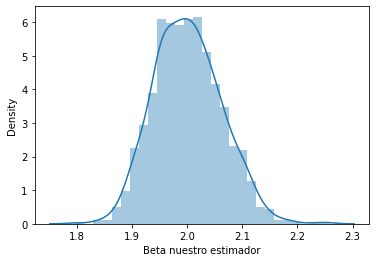

In [11]:
import seaborn as sns

sns.distplot(three_estimators['Beta nuestro estimador'])

In [90]:
three_estimators.to_excel('Simulaciones_sin_intercepto.xlsx')

Comparación de los errores cuadraticos medios.

In [12]:
((three_estimators[['Beta nuestro estimador','Probit']] - [2,2])**2).mean()

Beta nuestro estimador    0.003774
Probit                    0.786625
dtype: float64

# Con intercepto

La función siguiente define el estimador con intercepto.

In [13]:
Phi_inv = ss.norm.ppf

def estimators_con_intercepto(X,W,y,alpha,sigma_w,sigma_eta):
    
    
    t_inv = Phi_inv(y.mean())
    
    c = np.exp((1/2)*t_inv**2)
    
    a = c*(W*y).mean()
    
    b = c*(X*y).mean()
    
    first_estimators = estimators_sin_intercepto(a,b,alpha,sigma_w,sigma_eta)
    
    beta1_est = first_estimators[0]
    theta_est = first_estimators[1]
    gamma = first_estimators[2]
    beta0_est = ((1/np.sqrt(2*np.pi))*t_inv)*gamma
    
    return beta0_est,beta1_est,theta_est,gamma

Definimos el generador de y_i con intercepto.

In [14]:
y_gen = lambda beta0,beta1,X,u : (beta0+beta1*X + u > 0).astype(int)

In [15]:
beta1 = beta
beta0 = 0.5

In [16]:
theta

0.7

En lo que sigue, epochs es el número de simulaciones, n es la cantidad de datos por cada simulación.

In [17]:
import time

t_I = time.time()

n = 200000

epochs = 1000



list_beta0_est = []
list_beta0_probit = []
list_beta1_est = []
list_beta1_probit = []
list_theta_est = []

for epoch in range(epochs):
    
   
   W = W_gen(sigma_w,n)
   eta_u = eta_u_gen(sigma_eta,theta,n)
   eta = eta_u[0]
   u = eta_u[1]
   X = X_gen(alpha,W,eta)
   y = y_gen(beta0,beta1,X,u)
   alpha_est = np.cov(X,W)[0,1]/W.var()
   sigma_eta_est = (X-alpha_est*W).std() 
   estimators = estimators_con_intercepto(X,W,y,alpha_est,sigma_w,sigma_eta_est)
   beta0_est = estimators[0]
   list_beta0_est.append(beta0_est)
   beta1_est = estimators[1]
   list_beta1_est.append(beta1_est)    
   beta_probit = smf.Probit(y,np.concatenate([np.ones((X.shape[0],1)),X.reshape((-1,1))],axis = 1)).fit().params
   beta0_probit = beta_probit[0]
   list_beta0_probit.append(beta0_probit)
   beta1_probit = beta_probit[1]
   list_beta1_probit.append(beta1_probit)
   theta_est = estimators[2]
   list_theta_est.append(theta_est) 

predictions = {'Beta_0 nuestro estimador':list_beta0_est,'Beta_1 nuestro estimador':list_beta1_est,\
               'Beta_0 probit' : list_beta0_probit , 'Beta_1 probit' : list_beta1_probit,
'Theta nuestro estimador':list_theta_est}
   
three_estimators = pd.DataFrame(predictions)

t_F = time.time()

print('Se demorró',round((t_F-t_I)/60,0),'minutos')

Optimization terminated successfully.
         Current function value: 0.232246
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233453
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230523
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.232357
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230920
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230700
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229891
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231006
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231393
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.232064
  

Optimization terminated successfully.
         Current function value: 0.230285
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231234
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229291
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.232270
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230485
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229941
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231182
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229463
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.228199
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230624
  

Optimization terminated successfully.
         Current function value: 0.230823
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230967
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231093
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230261
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.232768
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231250
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230311
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230110
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231122
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230990
  

Optimization terminated successfully.
         Current function value: 0.230926
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229906
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231166
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230318
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.232042
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231164
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231543
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231889
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230978
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231308
  

Optimization terminated successfully.
         Current function value: 0.228972
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231395
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231868
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229128
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230431
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229713
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230287
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230990
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.232124
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.232187
  

Optimization terminated successfully.
         Current function value: 0.232357
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230023
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231702
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231574
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230524
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.228914
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231122
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229980
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231297
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233528
  

Optimization terminated successfully.
         Current function value: 0.231567
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231542
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229175
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.232781
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230802
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.232229
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230533
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229003
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229317
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229936
  

Optimization terminated successfully.
         Current function value: 0.230875
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231724
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231214
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231211
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231378
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230347
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230586
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229212
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.232327
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231583
  

Optimization terminated successfully.
         Current function value: 0.232104
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230190
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229882
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230502
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231885
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230947
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231891
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230598
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.232175
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231950
  

Optimization terminated successfully.
         Current function value: 0.230836
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229276
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230279
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231689
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231750
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229305
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230822
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230342
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230500
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231519
  

Optimization terminated successfully.
         Current function value: 0.229483
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.234565
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231527
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230255
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230414
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230020
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230786
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230929
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230471
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230641
  

Optimization terminated successfully.
         Current function value: 0.231350
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230634
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231350
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231695
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231852
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230543
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230826
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.232435
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231055
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230487
  

Optimization terminated successfully.
         Current function value: 0.230376
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229146
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231739
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231544
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231234
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230041
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.229784
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231590
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.231276
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.230635
  

In [18]:
three_estimators.mean()

Beta_0 nuestro estimador    0.501649
Beta_1 nuestro estimador    2.005610
Beta_0 probit               0.577470
Beta_1 probit               2.886578
Theta nuestro estimador     0.700890
dtype: float64

In [19]:
three_estimators.std()

Beta_0 nuestro estimador    0.018268
Beta_1 nuestro estimador    0.063710
Beta_0 probit               0.005010
Beta_1 probit               0.012998
Theta nuestro estimador     0.018726
dtype: float64

En lo sigue, a cada simulación calculamos los errores cuadraticos medios de cada estimador.

In [20]:
((three_estimators[['Beta_0 nuestro estimador','Beta_0 probit','Beta_1 nuestro estimador',\
                 'Beta_1 probit']]-[0.5,0.5,2,2])**2).mean()      

Beta_0 nuestro estimador    0.000336
Beta_0 probit               0.006027
Beta_1 nuestro estimador    0.004086
Beta_1 probit               0.786189
dtype: float64

In [19]:
three_estimators.to_excel('Simulaciones_con_intercepto.xlsx')